## **Threshold Based Image** **Segmentation**

In [ ]:
import sys
import numpy as np
import skimage.color
import skimage.io
from skimage.viewer import ImageViewer
from matplotlib import pyplot as plt




**Simple** **Thresholding**

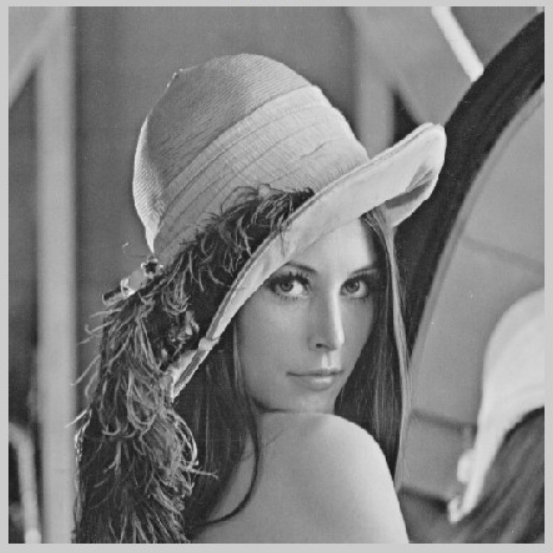

In [103]:
# read image, based on command line filename argument;
# read the image as grayscale from the outset
filename='picture.PNG'
sigma=2
t=0.8 #Manually selecting threshold value
image=skimage.io.imread('picture.PNG')

from IPython.display import HTML, Image, display

Image('picture.PNG')



In [121]:
histogram, bin_edges = np.histogram(image, bins=256)

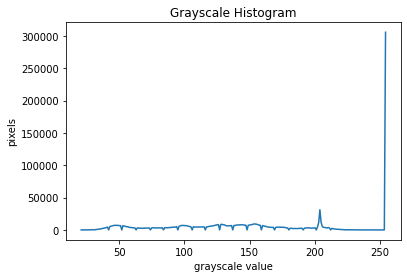

In [122]:
# configure and draw the histogram figure
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
# plt.ylim([0, 16000])
# plt.xlim([0.0, 1.0])  # <- named arguments do not work here

plt.plot(bin_edges[0:-1], histogram)  # <- or here
plt.show()

When we blur an image, we make the color transition from one side of an edge in the image to another smooth rather than sudden. The effect is to average out rapid changes in pixel intensity. The blur, or smoothing, of an image removes “outlier” pixels that may be noise in the image.

In [104]:
blur=skimage.color.rgb2gray(image)
blur=skimage.filters.gaussian(blur,sigma)

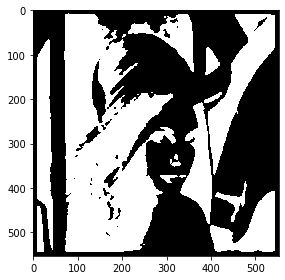

In [115]:
#creating mask to obtain colored image at later stage
mask=blur < 0.5
sel = np.zeros_like(image)
skimage.io.imshow(mask)


In [113]:
image.shape

(553, 553, 4)

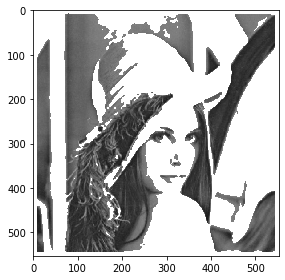

In [116]:
sel[mask] = image[mask]
skimage.io.imshow(sel)
# display the result


**Otsu's Thresholding**


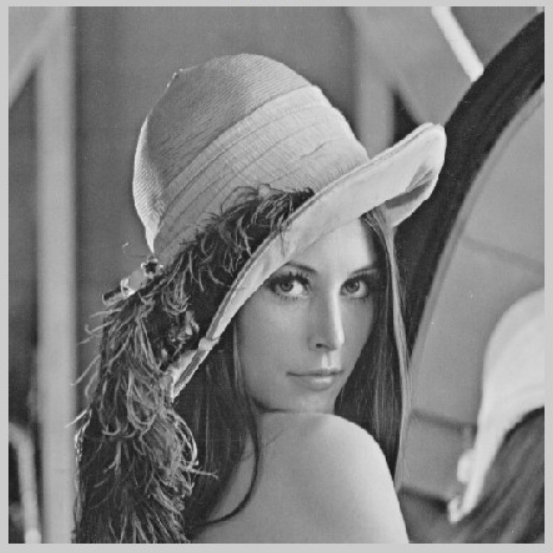

In [117]:
sigma=2
# t=0.8 no need 
image2=skimage.io.imread('picture.PNG')
Image('picture.PNG')

In [118]:
histogram2, bin_edges = np.histogram(image2, bins=256)

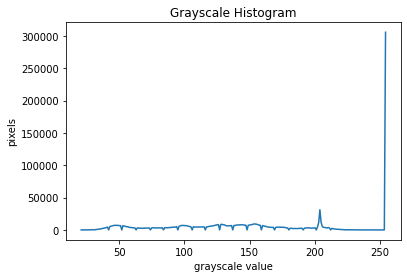

In [119]:
# configure and draw the histogram figure
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
# plt.ylim([0, 16000])
# plt.xlim([0.0, 1.0])  # <- named arguments do not work here

plt.plot(bin_edges[0:-1], histogram2)  # <- or here
plt.show()

In [123]:
sigma=1.0
blur=skimage.color.rgb2gray(image2)
blur=skimage.filters.gaussian(blur,sigma)

In [124]:
blur.shape

(553, 553)

In [147]:
# perform otsu thresholding
t = skimage.filters.threshold_otsu(blur)
mask2 = blur > t
t #calculated using iterations

0.4741574578442087

In [137]:
blur=skimage.color.rgb2gray(image2)
blur=skimage.filters.gaussian(blur,sigma)

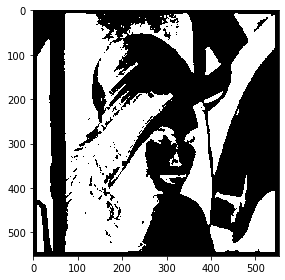

In [143]:
mask1=blur < 0.5
sel1 = np.zeros_like(image2)
skimage.io.imshow(mask1)

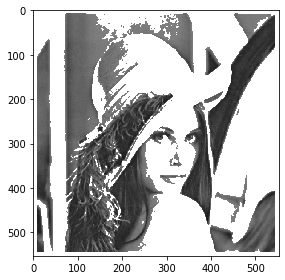

In [144]:
# sel1 = np.zeros_like(image2)
sel1[mask1] = image2[mask1]
skimage.io.imshow(sel1)

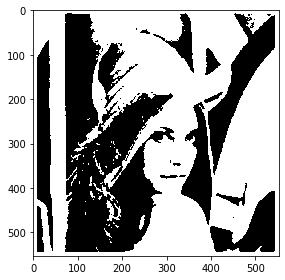

In [145]:
skimage.io.imshow(mask2)

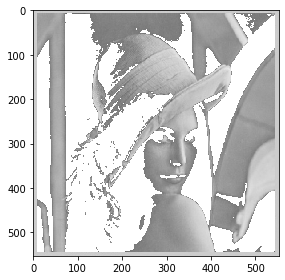

In [146]:
sel2 = np.zeros_like(image2)
sel2[mask2] = image2[mask2]
skimage.io.imshow(sel2)

**Adaptive Thresholding**

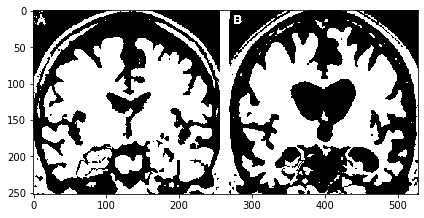

In [148]:
import cv2  
import numpy as np  
   
# path to input image is specified and   
# image is loaded with imread command  
# image1 = cv2.imread('threshold_img1.jpg')  
image1 = cv2.imread('brain.jpg') 


# cv2.cvtColor is applied over the 
# image input with applied parameters 
# to convert the image in grayscale  
img = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY) 
   
# applying different thresholding  
# techniques on the input image 
thresh1 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY, 199, 5) 
  
thresh2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY, 199, 5) 
  
# the window showing output images 
# with the corresponding thresholding  
skimage.io.imshow(thresh1)
# skimage.io.imshow(thresh2)
     


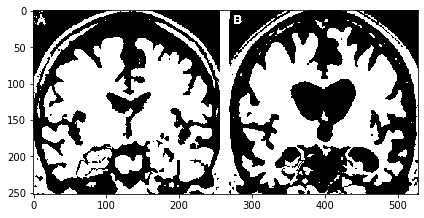

In [149]:
skimage.io.imshow(thresh2)
# De-allocate any associated memory usage   
if cv2.waitKey(0) & 0xff == 27:  
    cv2.destroyAllWindows() 

## **Region Based Image** **Segmentation**

**Region Growing**

In [ ]:
import math
# from IPython.display import HTML, Image, display
from PIL import Image
from pylab import *
import matplotlib.cm as cm
import scipy as sp
import random

In [ ]:
#converting image to array
im = Image.open('input1.jpg').convert('L')
arr = np.asarray(im)

out = Image.open('out1.jpg').convert('L')
arr_out = np.asarray(out)

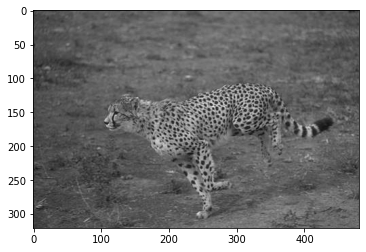

In [ ]:
rows,columns = np.shape(arr)
#print '\nrows',rows,'columns',columns
plt.figure()
plt.imshow(im)
plt.gray()

In [ ]:
print ('\nPlease select the initial seed point')


Please select the initial seed point


In [ ]:
pseed = plt.ginput(1)

<Figure size 432x288 with 0 Axes>

In [ ]:
# x=(int)(pseed[0][0])
# y=(int)(pseed[0][1])
x=int(179)
y=int(86)
seed_pixel=[]
seed_pixel.append(x)
seed_pixel.append(y)

In [ ]:
print('you clicked:',seed_pixel)

you clicked: [179, 86]


In [ ]:
plt.close()

In [ ]:
img_rg=np.zeros((rows+1,columns+1))
img_rg[seed_pixel[0]][seed_pixel[1]]=255.0
img_display=np.zeros((rows,columns))

In [ ]:
region_points=[]
region_points.append([x,y])


 loop runs till region growing is complete

TPR is: 0.9893147738254824

FPR is: 0.2948300310428084

Fscore: 0.9655279951927831


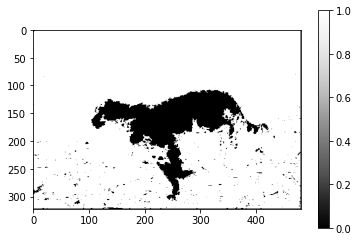

In [150]:
#function for implementing region growing
def find_region():
  print('\n loop runs till region growing is complete')
  count=0
  x=[-1,0,1,-1,1,-1,0,1] # 8 connected
  y=[-1,-1,-1,0,0,1,1,1]
  while(len(region_points)>0):
    if(count==0):
      point = region_points.pop(0)
      i=point[0]
      j=point[1]
    print('loop runs till length become zero:')
    print('len',len(region_points))
    val=arr[i][j]
    lt=val-8
    ht=val+8
    for  k in range(8):
      if(img_rg[i+x[k]][j+y[k]]!=1):
        try:
          if arr[i+x[k]][j+y[k]]>lt and arr[i+x[k]][j+y[k]]<ht:
            img_rg[i+x[k]][j+y[k]]=1
            p=[0,0]
            p[0]=i+x[k]
            p[1]=j+y[k]
            if p not in region_points:
              if 0<p[0] < rows and 0<p[1] < columns:
                region_points.append([i+x[k],j+y[k]])
          else:
            img_rg[i+x[k]][j+y[k]]=0
        except IndexError:
          continue

    point=region_points.pop(0)
    i=point[0]
    j=point[1]
    count=count+1
find_region()
ground_out=np.zeros((rows,columns))
for i in range(rows):
  for j in range(columns):
    if arr_out[i][j] > 125:
      ground_out[i][j]=int(1)
    else:
      ground_out[i][j]=int(0)
tp=0
tn=0
fn=0
fp=0

for i in range(rows):
	for j in range(columns):
		if ground_out[i][j] == 1 and img_rg[i][j] == 1:
			tp = tp + 1
		if ground_out[i][j] == 0 and img_rg[i][j] == 0:
			tn = tn + 1
		if ground_out[i][j] == 1 and img_rg[i][j] == 0:
			fn = fn + 1
		if ground_out[i][j] == 0 and img_rg[i][j] == 1:
			fp = fp + 1
#computing false positive and True positive
tpr= float(tp)/(tp+fn)
print("\nTPR is:",tpr)

#fp rate is
fpr= float(fp)/(fp+tn)
print("\nFPR is:",fpr)

#F-score as 2TP/(2TP + FP + FN)
fscore = float(2*tp)/((2*tp)+fp+fn)
print("\nFscore:",fscore)


plt.figure()
plt.imshow(img_rg, cmap="Greys_r")
plt.colorbar()
plt.show()

## **ANN based Image** **Segmentation**

**U-Net Model**

Dataset used for this is Oxford-IIIT pet dataset


In [ ]:
!pip install git+https://github.com/tensorflow/examples.git
!pip install -U tfds-nightly

  Cloning https://github.com/tensorflow/examples.git to /tmp/pip-req-build-d8_2hzt3
  Running command git clone -q https://github.com/tensorflow/examples.git /tmp/pip-req-build-d8_2hzt3
  Created wheel for tensorflow-examples: filename=tensorflow_examples-bb80bf41a6d76abd9e5229f687095ed32a9e5672_-cp36-none-any.whl size=131268 sha256=dfc73041366793d1d2bb5ea4c523cb2e2bba922f0c20db496d31a737ba6a6e45
  Stored in directory: /tmp/pip-ephem-wheel-cache-kr3i1gcu/wheels/83/64/b3/4cfa02dc6f9d16bf7257892c6a7ec602cd7e0ff6ec4d7d714d
Successfully built tensorflow-examples
     |████████████████████████████████| 3.4MB 5.5MB/s 


In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow_examples.models.pix2pix import pix2pix

import tensorflow_datasets as tfds
tfds.disable_progress_bar()

from IPython.display import clear_output
import matplotlib.pyplot as plt

In [ ]:
# downloading the oxford-IIIT dataset
# The dataset is already included in TensorFlow datasets, all that is needed to do is download it.
# The segmentation masks are included in version 3+.
dataset,info=tfds.load('oxford_iiit_pet:3.*.*',with_info=True)

Shuffling and writing examples to /root/tensorflow_datasets/oxford_iiit_pet/3.2.0.incompletePKOL27/oxford_iiit_pet-train.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/oxford_iiit_pet/3.2.0.incompletePKOL27/oxford_iiit_pet-test.tfrecord
Dataset oxford_iiit_pet downloaded and prepared to /root/tensorflow_datasets/oxford_iiit_pet/3.2.0. Subsequent calls will reuse this data.


 Now performing simple augmentation and in addition we normalize the pixel
 to[0,1]. finally, labels are:{0,1,2}

In [ ]:
def normalize(input_image,input_mask):
  input_image=tf.cast(input_image,tf.float32)/255.0
  input_mask -= 1
  return input_image,input_mask

In [ ]:
@tf.function
def load_image_train(datapoint):
  input_image = tf.image.resize(datapoint['image'], (128, 128))
  input_mask = tf.image.resize(datapoint['segmentation_mask'], (128, 128))

  if tf.random.uniform(()) > 0.5:
    input_image = tf.image.flip_left_right(input_image)
    input_mask = tf.image.flip_left_right(input_mask)

  input_image, input_mask = normalize(input_image, input_mask)

  return input_image, input_mask

In [ ]:
def load_image_test(datapoint):
  input_image = tf.image.resize(datapoint['image'], (128, 128))
  input_mask = tf.image.resize(datapoint['segmentation_mask'], (128, 128))

  input_image, input_mask = normalize(input_image, input_mask)

  return input_image, input_mask


This dataset already contains the required splits of test and train so we will use the same


In [ ]:
TRAIN_LENGTH = info.splits['train'].num_examples
BATCH_SIZE = 64
BUFFER_SIZE = 1000
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE

In [ ]:
train = dataset['train'].map(load_image_train, num_parallel_calls=tf.data.experimental.AUTOTUNE)
test = dataset['test'].map(load_image_test)

In [ ]:
train_dataset = train.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
train_dataset = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_dataset = test.batch(BATCH_SIZE)

In [ ]:
def display(display_list):
  plt.figure(figsize=(15, 15))

  title = ['Input Image', 'True Mask', 'Predicted Mask']

  for i in range(len(display_list)):
    plt.subplot(1, len(display_list), i+1)
    plt.title(title[i])
    plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
    plt.axis('off')
  plt.show()


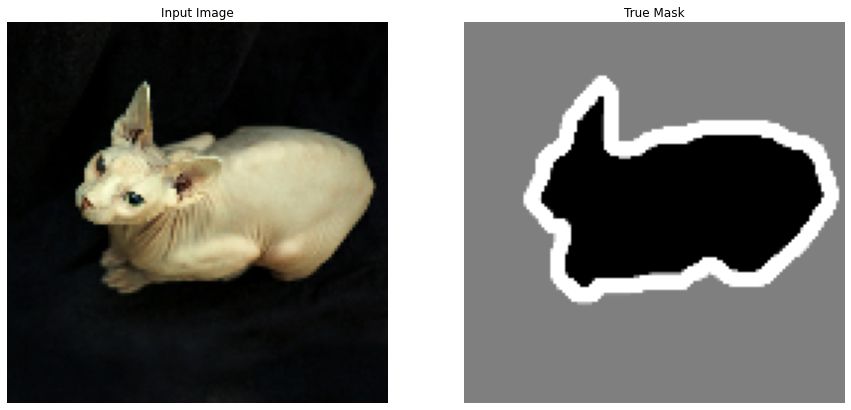

In [ ]:
for image, mask in train.take(1):
  sample_image, sample_mask = image, mask
display([sample_image, sample_mask])

The model used is U-Net model which consist of an encoder and decoder.

In [ ]:
OUTPUT_CHANNELS = 3
# The reason to output three channels is because there
#  are three possible labels for each pixel

The encoder will be a pretrained MobileNetV2 model which is prepared and ready to use in tf.keras.applications.

In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape=[128, 128, 3], include_top=False)

# Use the activations of these layers
layer_names = [
    'block_1_expand_relu',   # 64x64
    'block_3_expand_relu',   # 32x32
    'block_6_expand_relu',   # 16x16
    'block_13_expand_relu',  # 8x8
    'block_16_project',      # 4x4
]
layers = [base_model.get_layer(name).output for name in layer_names]

# Create the feature extraction model
down_stack = tf.keras.Model(inputs=base_model.input, outputs=layers)

down_stack.trainable = False

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
up_stack = [
    pix2pix.upsample(512, 3),  # 4x4 -> 8x8
    pix2pix.upsample(256, 3),  # 8x8 -> 16x16
    pix2pix.upsample(128, 3),  # 16x16 -> 32x32
    pix2pix.upsample(64, 3),   # 32x32 -> 64x64
]

In [ ]:
def unet_model(output_channels):
  inputs = tf.keras.layers.Input(shape=[128, 128, 3])
  x = inputs

  # Downsampling through the model
  skips = down_stack(x)
  x = skips[-1]
  skips = reversed(skips[:-1])

  # Upsampling and establishing the skip connections
  for up, skip in zip(up_stack, skips):
    x = up(x)
    concat = tf.keras.layers.Concatenate()
    x = concat([x, skip])

  # This is the last layer of the model
  last = tf.keras.layers.Conv2DTranspose(
      output_channels, 3, strides=2,
      padding='same')  #64x64 -> 128x128

  x = last(x)

  return tf.keras.Model(inputs=inputs, outputs=x)


Since we have more then two labels loss being used is SparseCategoricalCrossEntropy

In [ ]:
model = unet_model(OUTPUT_CHANNELS)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# tf.keras.utils.plot_model(model,show_shapes=True)

In [ ]:
def create_mask(pred_mask):
  pred_mask = tf.argmax(pred_mask, axis=-1)
  pred_mask = pred_mask[..., tf.newaxis]
  return pred_mask[0]


In [ ]:
def show_predictions(dataset=None, num=1):
  if dataset:
    for image, mask in dataset.take(num):
      pred_mask = model.predict(image)
      display([image[0], mask[0], create_mask(pred_mask)])
  else:
    display([sample_image, sample_mask,
             create_mask(model.predict(sample_image[tf.newaxis, ...]))])

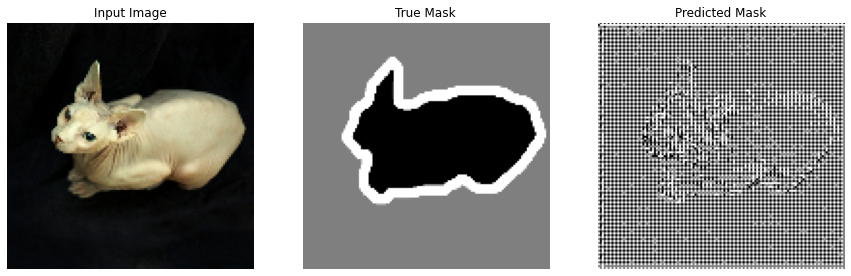

In [ ]:
show_predictions()

In [ ]:
class DisplayCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    clear_output(wait=True)
    show_predictions()
    print ('\nSample Prediction after epoch {}\n'.format(epoch+1))

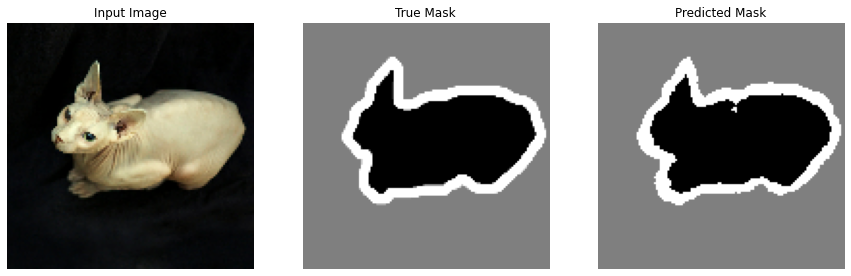


Sample Prediction after epoch 20

57/57 [==============================] - 302s 5s/step - loss: 0.1339 - accuracy: 0.9388 - val_loss: 0.3191 - val_accuracy: 0.8889


In [ ]:
EPOCHS = 20
VAL_SUBSPLITS = 5
VALIDATION_STEPS = info.splits['test'].num_examples//BATCH_SIZE//VAL_SUBSPLITS

model_history = model.fit(train_dataset, epochs=EPOCHS,
                          steps_per_epoch=STEPS_PER_EPOCH,
                          validation_steps=VALIDATION_STEPS,
                          validation_data=test_dataset,
                          callbacks=[DisplayCallback()])

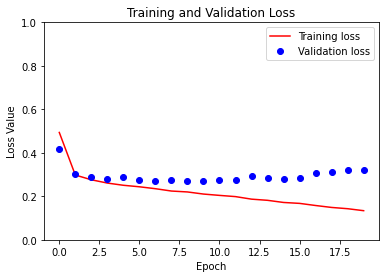

In [ ]:
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs = range(EPOCHS)

plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'bo', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([0, 1])
plt.legend()
plt.show()

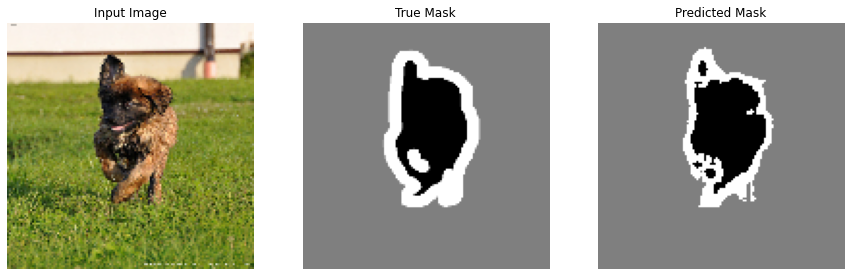

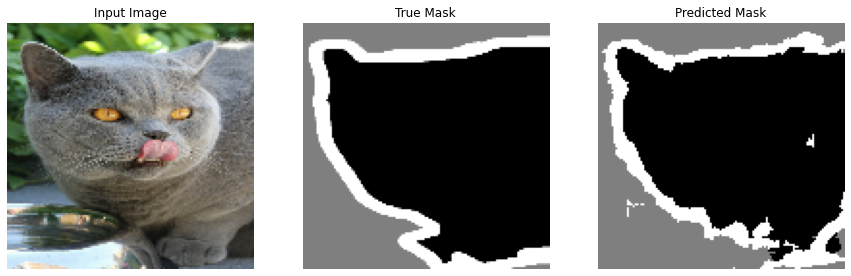

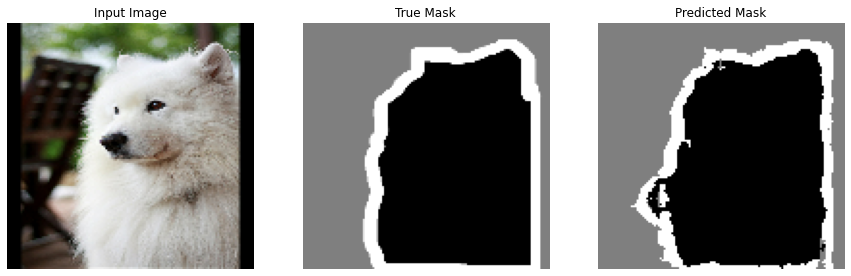

In [ ]:
show_predictions(test_dataset, 3)